### Importing libraries

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats as stats
from statistics import NormalDist

In [2]:
df = pd.read_csv("PCS_TEST_DETERMINSTIC.csv")
df.head()

,Arrival no,Arrival time (sec),Base station,Base station pair,Call duration (sec),Call duration pair (sec),velocity (km/h),velocity pair (km/h),inter-arrival time (sec),inter-arrival time pair (sec)
0,1,0.000,18,7.0,76.134,159.056,125.934,95.511,0.000,0.068
1,2,0.068,7,6.0,159.056,179.465,95.511,127.757,0.068,0.491
2,3,0.559,6,14.0,179.465,163.108,127.757,134.311,0.491,0.066
3,4,0.625,14,2.0,163.108,95.054,134.311,112.272,0.066,0.720
4,5,1.345,2,4.0,95.054,12.987,112.272,121.186,0.720,0.243


### Inter-arrival time plots

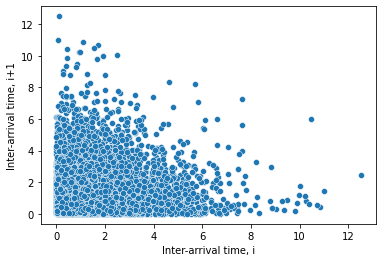

In [3]:
sb.scatterplot(data = df, x = "inter-arrival time (sec)", y = "inter-arrival time pair (sec)")
plt.xlabel("Inter-arrival time, i")
plt.ylabel("Inter-arrival time, i+1")
plt.show()

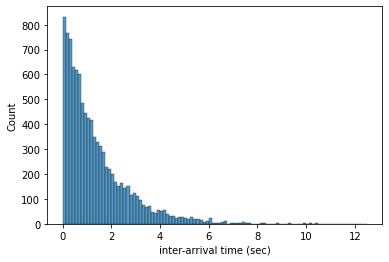

In [4]:
fig = sb.histplot(data = df, x = "inter-arrival time (sec)", bins = 100)
plt.show()

In [5]:
df["inter-arrival time (sec)"].describe()

count    10000.000000
mean         1.369683
std          1.343925
min          0.000000
25%          0.408000
50%          0.961500
75%          1.892000
max         12.499000
Name: inter-arrival time (sec), dtype: float64

### Base station plots

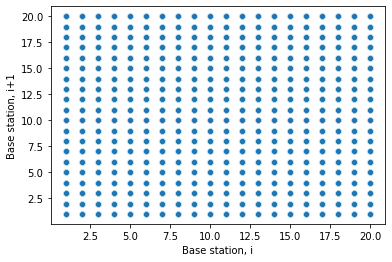

In [6]:
sb.scatterplot(data = df, x = df.iloc[:,2], y = df.iloc[:,3])
plt.xlabel("Base station, i")
plt.ylabel("Base station, i+1")
plt.show()

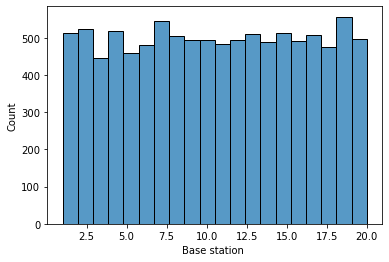

In [7]:
sb.histplot(data = df, x = df.iloc[:,2], bins = 20)
plt.show()

In [8]:
df.iloc[:,2].describe()

count    10000.00000
mean        10.54220
std          5.78662
min          1.00000
25%          6.00000
50%         11.00000
75%         16.00000
max         20.00000
Name: Base station , dtype: float64

### Call duration plots

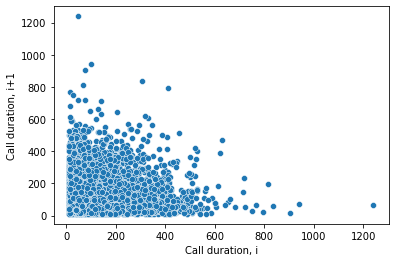

In [9]:
sb.scatterplot(data = df, x = "Call duration (sec)", y = "Call duration pair (sec)")
plt.xlabel("Call duration, i")
plt.ylabel("Call duration, i+1")
plt.show()

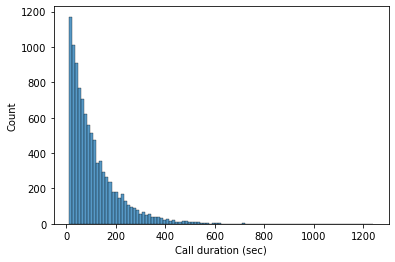

In [10]:
sb.histplot(data = df, x = "Call duration (sec)", bins = 100)
plt.show()

In [11]:
df["Call duration (sec)"].describe()

count    10000.000000
mean       109.835897
std         99.138915
min         10.004000
25%         38.777750
50%         79.937500
75%        148.109500
max       1239.836000
Name: Call duration (sec), dtype: float64

### Velocity plots

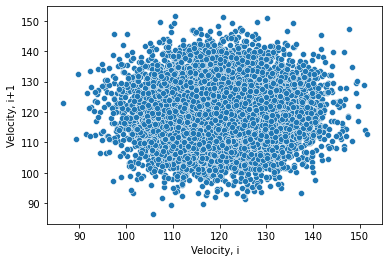

In [12]:
sb.scatterplot(data = df, x = "velocity (km/h)", y = "velocity pair (km/h)")
plt.xlabel("Velocity, i")
plt.ylabel("Velocity, i+1")
plt.show()

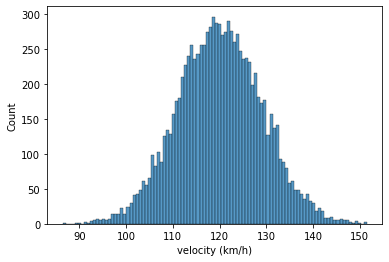

In [13]:
sb.histplot(data = df, x = "velocity (km/h)", bins = 100)
plt.show()

In [14]:
df["velocity (km/h)"].describe()

count    10000.000000
mean       120.072095
std          9.019056
min         86.423000
25%        113.892500
50%        120.021500
75%        126.188250
max        151.501000
Name: velocity (km/h), dtype: float64

### Inter-arrival time Chi-Square Test

In [15]:
df.head()

,Arrival no,Arrival time (sec),Base station,Base station pair,Call duration (sec),Call duration pair (sec),velocity (km/h),velocity pair (km/h),inter-arrival time (sec),inter-arrival time pair (sec)
0,1,0.000,18,7.0,76.134,159.056,125.934,95.511,0.000,0.068
1,2,0.068,7,6.0,159.056,179.465,95.511,127.757,0.068,0.491
2,3,0.559,6,14.0,179.465,163.108,127.757,134.311,0.491,0.066
3,4,0.625,14,2.0,163.108,95.054,134.311,112.272,0.066,0.720
4,5,1.345,2,4.0,95.054,12.987,112.272,121.186,0.720,0.243


In [16]:
n = 10000
k = int(math.sqrt(n))
s = 1
d = k - s - 1
p = 1 / k
expected = n * p
beta = df["inter-arrival time (sec)"].mean()

In [17]:
end_points = [0]

for i in range(k - 1):
    a = beta * np.log(1 / (1 - (i + 1) * p))
    end_points.append(a)
    
end_points.append(float('inf'))

In [18]:
observed = np.zeros(k)
data = df["inter-arrival time (sec)"]

for i in range(1, len(end_points) + 1): # 1 to 101 instead of 0 to 100
    for j in data:
        if end_points[i - 1] <= j < end_points[i]:
            observed[i - 1] += 1
            
observed

array([ 99.,  90.,  93.,  97., 104.,  90., 103.,  89., 101.,  94., 103.,
        94.,  97.,  99., 102.,  90.,  98., 108.,  98.,  96.,  90., 111.,
        97., 101.,  93.,  93.,  95., 102., 106.,  93.,  81.,  98.,  97.,
       116., 102., 105.,  95., 101., 113., 111., 101., 125., 102.,  85.,
        86.,  90., 109., 109., 112.,  96.,  93.,  87., 105., 101., 106.,
        90.,  93., 107., 104., 138.,  88.,  91., 103., 104., 100., 111.,
       110., 108., 109.,  94., 119., 105.,  87.,  99.,  97.,  90., 110.,
       117.,  75.,  91.,  92.,  81., 105., 105.,  94., 129.,  98., 111.,
       116., 102., 111.,  86., 101.,  79., 105., 114.,  89., 111.,  98.,
        81.])

In [19]:
expected_list = np.full(k, expected)
chi_table = pd.DataFrame({"Observed" : observed, "Expected" : expected_list})
chi_table

,Observed,Expected
0,99.0,100.0
1,90.0,100.0
2,93.0,100.0
3,97.0,100.0
4,104.0,100.0
...,...,...
95,114.0,100.0
96,89.0,100.0
97,111.0,100.0
98,98.0,100.0


In [20]:
stats.chisquare(chi_table["Observed"], chi_table["Expected"], s)

Power_divergenceResult(statistic=112.53999999999999, pvalue=0.1495602607702584)

### Base station Chi-Square Test

In [21]:
df.head()

,Arrival no,Arrival time (sec),Base station,Base station pair,Call duration (sec),Call duration pair (sec),velocity (km/h),velocity pair (km/h),inter-arrival time (sec),inter-arrival time pair (sec)
0,1,0.000,18,7.0,76.134,159.056,125.934,95.511,0.000,0.068
1,2,0.068,7,6.0,159.056,179.465,95.511,127.757,0.068,0.491
2,3,0.559,6,14.0,179.465,163.108,127.757,134.311,0.491,0.066
3,4,0.625,14,2.0,163.108,95.054,134.311,112.272,0.066,0.720
4,5,1.345,2,4.0,95.054,12.987,112.272,121.186,0.720,0.243


In [22]:
n = 10000
k = 20
s = 2
d = k - s - 1
p = 1 / k
expected = n * p
start = 1
end = 20

In [23]:
end_points = [0]

for i in range(k - 1):
    a = (i + 1) * p * (end - start) + start
    end_points.append(a)
    
end_points.append(float('inf'))

In [24]:
observed = np.zeros(k)
data = df.iloc[:,2]

for i in range(1, len(end_points) + 1): # 1 to 101 instead of 0 to 100
    for j in data:
        if end_points[i - 1] <= j < end_points[i]:
            observed[i - 1] += 1
            
observed

array([512., 525., 446., 518., 460., 480., 545., 506., 494., 495., 483.,
       494., 510., 488., 514., 493., 507., 476., 557., 497.])

In [25]:
expected_list = np.full(k, expected)
chi_table = pd.DataFrame({"Observed" : observed, "Expected" : expected_list})
chi_table

,Observed,Expected
0,512.0,500.0
1,525.0,500.0
2,446.0,500.0
3,518.0,500.0
4,460.0,500.0
5,480.0,500.0
6,545.0,500.0
7,506.0,500.0
8,494.0,500.0
9,495.0,500.0


In [26]:
stats.chisquare(chi_table["Observed"], chi_table["Expected"], s)

Power_divergenceResult(statistic=25.656000000000002, pvalue=0.08096005132188358)

### Call duration Chi-Square Test

In [27]:
df.head()

,Arrival no,Arrival time (sec),Base station,Base station pair,Call duration (sec),Call duration pair (sec),velocity (km/h),velocity pair (km/h),inter-arrival time (sec),inter-arrival time pair (sec)
0,1,0.000,18,7.0,76.134,159.056,125.934,95.511,0.000,0.068
1,2,0.068,7,6.0,159.056,179.465,95.511,127.757,0.068,0.491
2,3,0.559,6,14.0,179.465,163.108,127.757,134.311,0.491,0.066
3,4,0.625,14,2.0,163.108,95.054,134.311,112.272,0.066,0.720
4,5,1.345,2,4.0,95.054,12.987,112.272,121.186,0.720,0.243


In [28]:
df["Call duration norm (sec)"] = df["Call duration (sec)"] - df["Call duration (sec)"].min()
df.head()

,Arrival no,Arrival time (sec),Base station,Base station pair,Call duration (sec),Call duration pair (sec),velocity (km/h),velocity pair (km/h),inter-arrival time (sec),inter-arrival time pair (sec),Call duration norm (sec)
0,1,0.000,18,7.0,76.134,159.056,125.934,95.511,0.000,0.068,66.130
1,2,0.068,7,6.0,159.056,179.465,95.511,127.757,0.068,0.491,149.052
2,3,0.559,6,14.0,179.465,163.108,127.757,134.311,0.491,0.066,169.461
3,4,0.625,14,2.0,163.108,95.054,134.311,112.272,0.066,0.720,153.104
4,5,1.345,2,4.0,95.054,12.987,112.272,121.186,0.720,0.243,85.050


In [29]:
df["Call duration norm (sec)"].describe()

count    10000.000000
mean        99.831897
std         99.138915
min          0.000000
25%         28.773750
50%         69.933500
75%        138.105500
max       1229.832000
Name: Call duration norm (sec), dtype: float64

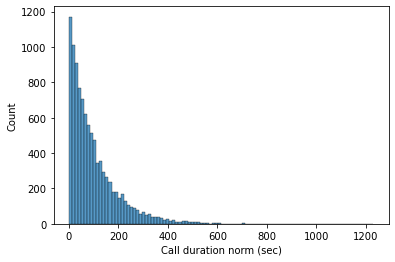

In [30]:
sb.histplot(data = df, x = "Call duration norm (sec)", bins = 100)
plt.show()

In [31]:
n = 10000
k = int(math.sqrt(n))
s = 1
d = k - s - 1
p = 1 / k
expected = n * p
beta = 99.832

In [32]:
end_points = [0]

for i in range(k - 1):
    a = beta * np.log(1 / (1 - (i + 1) * p))
    end_points.append(a)
    
end_points.append(float('inf'))

In [33]:
observed = np.zeros(k)
data = df["Call duration norm (sec)"]

for i in range(1, len(end_points) + 1): # 1 to 101 instead of 0 to 100
    for j in data:
        if end_points[i - 1] <= j < end_points[i]:
            observed[i - 1] += 1
            
observed

array([ 83.,  97., 108.,  98., 111., 100., 101.,  92., 110.,  91., 109.,
       115., 101.,  99., 109.,  97., 106.,  87.,  94., 111.,  87.,  92.,
        78., 117., 101., 107.,  99.,  96., 112.,  94.,  98., 112., 104.,
       115.,  78.,  86.,  82.,  76., 112.,  86., 105.,  96., 103., 108.,
       115.,  87., 106.,  99.,  90., 103., 103.,  90.,  93., 104., 100.,
        99., 108., 101., 100.,  96., 130., 102., 111., 110.,  95., 111.,
       113.,  88.,  93.,  87., 102., 103., 107., 100.,  98., 102.,  94.,
       104.,  97., 100., 102., 106.,  94.,  85.,  91., 106.,  85., 100.,
       122., 111.,  89., 100., 110.,  94.,  93., 101., 107., 113.,  94.,
        93.])

In [34]:
expected_list = np.full(k, expected)
chi_table = pd.DataFrame({"Observed" : observed, "Expected" : expected_list})
chi_table

,Observed,Expected
0,83.0,100.0
1,97.0,100.0
2,108.0,100.0
3,98.0,100.0
4,111.0,100.0
...,...,...
95,101.0,100.0
96,107.0,100.0
97,113.0,100.0
98,94.0,100.0


In [35]:
stats.chisquare(chi_table["Observed"], chi_table["Expected"], s)

Power_divergenceResult(statistic=97.55999999999997, pvalue=0.4935436856180209)

### Velocity Chi-Square Test

In [36]:
df.head()

,Arrival no,Arrival time (sec),Base station,Base station pair,Call duration (sec),Call duration pair (sec),velocity (km/h),velocity pair (km/h),inter-arrival time (sec),inter-arrival time pair (sec),Call duration norm (sec)
0,1,0.000,18,7.0,76.134,159.056,125.934,95.511,0.000,0.068,66.130
1,2,0.068,7,6.0,159.056,179.465,95.511,127.757,0.068,0.491,149.052
2,3,0.559,6,14.0,179.465,163.108,127.757,134.311,0.491,0.066,169.461
3,4,0.625,14,2.0,163.108,95.054,134.311,112.272,0.066,0.720,153.104
4,5,1.345,2,4.0,95.054,12.987,112.272,121.186,0.720,0.243,85.050


In [37]:
n = 10000
k = int(math.sqrt(n))
s = 2
d = k - s - 1
p = 1 / k
expected = n * p
mean = 120.072
std = df["velocity (km/h)"].std()

In [38]:
end_points = [0]
norm = NormalDist(mu = mean, sigma = std)

for i in range(k - 1):
    a = norm.inv_cdf((i + 1) * p)
    end_points.append(a)
    
end_points.append(float('inf'))

In [39]:
observed = np.zeros(k)
data = df["velocity (km/h)"]

for i in range(1, len(end_points) + 1): # 1 to 101 instead of 0 to 100
    for j in data:
        if end_points[i - 1] <= j < end_points[i]:
            observed[i - 1] += 1
            
observed

array([101.,  86., 110.,  95., 100., 116.,  94.,  97.,  81., 106., 103.,
        98.,  94.,  79., 114., 100., 108.,  89., 106., 111., 112., 107.,
       106., 114., 103., 106., 120., 100.,  88., 113.,  84.,  91., 104.,
        98., 102.,  92.,  94.,  90., 113., 103.,  93.,  97.,  93., 119.,
       103.,  89., 108., 105.,  88., 105.,  98.,  93.,  97.,  90., 100.,
       107.,  85., 116.,  97.,  95., 121.,  88.,  94.,  87., 101., 105.,
       102.,  96.,  90., 107.,  77., 109., 104., 103., 100., 113.,  90.,
        95.,  96., 114.,  97., 103.,  91., 106.,  96., 108.,  87.,  93.,
       113.,  99., 116., 120.,  95.,  98.,  90.,  86.,  84., 100., 113.,
       107.])

In [40]:
expected_list = np.full(k, expected)
chi_table = pd.DataFrame({"Observed" : observed, "Expected" : expected_list})
chi_table

,Observed,Expected
0,101.0,100.0
1,86.0,100.0
2,110.0,100.0
3,95.0,100.0
4,100.0,100.0
...,...,...
95,86.0,100.0
96,84.0,100.0
97,100.0,100.0
98,113.0,100.0


In [41]:
stats.chisquare(chi_table["Observed"], chi_table["Expected"], s)

Power_divergenceResult(statistic=97.35999999999999, pvalue=0.4706296267011268)